# Exercises Neural Networks

In [2]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from Resources.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

# Guidelines
1. Activation function for hidden layers: relu or sigmoid are popular.
2. Activation function for the output layer:
    - Classification with one-hot encoding: softmax (provides probabilities for each output summing to 1).
    - Classification with 2 classes and 1 output: sigmoid (provides 1 probability). PS: One-hot encoding can also be used for 2 classes (then you have 2 outputs).
    - Regression: linear.
3. Backpropagation algorithm: Adam is popular (learning_rate indicates how much the weights/biases are adjusted).
4. Loss function:
    - Classification with one-hot encoding: `categorical_crossentropy` (a type of distance between probabilities).
    - Classification with 2 classes and 1 output: `binary_crossentropy`.
    - Regression: `MeanSquaredError` or `MeanAbsoluteError`.
5. Metrics can be optionally added.
6. Epochs: Number of times you iterate over the entire training dataset.
7. Batch size: Size of the batch (default is 32) after which backpropagation (adjustment of weights/biases) occurs. For example, if the training dataset contains 1000 samples and the batch size is 100, there will be 10 backpropagation per epoch.

|                                | Output Activation | Loss                     | Metrics                       |
|:-------------------------------|:------------------|:-------------------------|:------------------------------|
| Regression                     | Linear            | MeanSquaredError()       | MeanAbsolutePercentageError() |
|                                |                   | MeanAbsoluteError()      |                               |
| Classificatie 1 output         | Sigmoid           | Binary_crossentropy      | Accuracy                      |
| Classificatie one-hot encoding | Softmax           | Categorical_crossentropy | Accuracy                      |


## Theoretical questions
> **Goal**: 

### Question 0: Demo ANN (Artificial Neural Network)

In [177]:
# This is one Artificial Neuron with 2 inputs (1,1), 2 weights (0.3, -0.1) and 1 bias (-0.7)
inputANN = pd.array([1,1])
weightsANN = pd.array([0.3, -0.1])
biasANN = -0.7

integratie = np.dot(inputANN, weightsANN) + biasANN
print(f"Output Integration: {integratie}")

activation = 1 / (1 + math.exp(-integratie))
print(f"Output Activation: {activation}")

Output Integration: -0.5
Output Activation: 0.3775406687981454


### Question 0: XOR ANN (Artificial Neural Network)

In [178]:
# Stap 1: Data
xor_data = pd.DataFrame({'P1': [0,1,0,1], 'P2': [0,0,1,1], 'Q' : [0,1,1,0]})
x_xor_data= xor_data[['P1', 'P2']]
y_xor_data = xor_data[['Q']]
                       
# Step 2: Model
inputs_xor = Input(shape=(2,))
x_xor = Dense(2, activation='sigmoid')(inputs_xor) # Or relu
outputs_xor = Dense(1, activation='sigmoid')(x_xor) # Or relu
model_xor = Model(inputs_xor, outputs_xor, name='XOR_NN')

# Step 3: Compile
model_xor.compile(optimizer=Adam(learning_rate=0.00001), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [179]:
# Step 4: Fit
history_xor = model_xor.fit(
                            x_xor_data, 
                            y_xor_data, 
                            epochs=200, 
                            callbacks=[PlotLossesKeras()], 
                            verbose=False)

accuracy
	accuracy         	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	loss             	 (min:    0.702, max:    0.702, cur:    0.702)


In [180]:
model_xor.summary()

Model: "XOR_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

### Question 1: The Simpsons Revisited
- We want to be able to predict the gender of a Simpson using... a neural network. This dataset is very small, and therefore we cannot construct a validation set or test set.
    - Read the Simpsons dataset (`The_Simpsons_Original.csv`).
    - Determine which columns we cannot use with this prediction?
    - Now create an input training data set `x_simpsons` and normalize it (min-max normalization). Do the same for the output column(y4_simpsons).
    - Create a neural network with the correct inputs and outputs.
    - Use your neural network to predict the gender of your `x_simpsons`. Do they match the targets? Also predict the gender of the unknown Simpson (Comic guy: `hairlenght=8`, `weight=500`, `age=38`). Does this match the prediction you were made with decision trees?

**Name of Columns**: `name` `hair length` `weight` `age` `gender`

In [181]:
# 1
theSimpsonsOriginal = pd.read_csv('../Data/The_Simpsons_Original.csv', delimiter=',')
display(theSimpsonsOriginal.head())

,name,hair length,weight,age,gender
0,Homer,0,250,36,M
1,Marge,10,150,34,F
2,Bart,2,90,10,M
3,Lisa,6,78,8,F
4,Maggie,4,20,1,F


In [182]:
# 2
theSimpsonsOriginal = theSimpsonsOriginal.drop(columns=['name'])
display(theSimpsonsOriginal.head())
print("We can't use the column 'name' in this prediction. It's a unique identifier and string.")

,hair length,weight,age,gender
0,0,250,36,M
1,10,150,34,F
2,2,90,10,M
3,6,78,8,F
4,4,20,1,F


We can't use the column 'name' in this prediction. It's a unique identifier and string.


In [183]:
# 3
x_simpsons = theSimpsonsOriginal[['hair length', 'weight', 'age']]                                              # Get the input
y_simpsons = theSimpsonsOriginal[['gender']]                                                                    # Get the output

x_simpsons_norm = (x_simpsons - x_simpsons.min()) / (x_simpsons.max() - x_simpsons.min())                       # Normalization of the input
y_simpsons_rep = y_simpsons.replace(to_replace=['M', 'F'], value=[0, 1])                                        # Replace the output
y_simpsons_rep = to_categorical(y_simpsons_rep)                                                                 # One-hot encoding
y_simpsons_norm = (y_simpsons_rep - y_simpsons_rep.min()) / (y_simpsons_rep.max() - y_simpsons_rep.min())       # Normalization of the output

In [184]:
# 4
inputs_simpsons = Input(shape=(3,))
x_simp = Dense(6, activation='sigmoid')(inputs_simpsons)
x_simp = Dense(12, activation='sigmoid')(x_simp)
x_simp = Dense(24, activation='sigmoid')(x_simp)
x_simp = Dense(12, activation='sigmoid')(x_simp)
x_simp = Dense(6, activation='sigmoid')(x_simp)
outputs_simpsons = Dense(2, activation='softmax')(x_simp) # Activation=softmax for one-hot encoding (classification)
model_simpsons = Model(inputs_simpsons, outputs_simpsons, name='Simpsons_NN')

model_simpsons.compile(optimizer=Adam(learning_rate=0.00001), loss=keras.losses.binary_crossentropy, metrics=['accuracy']) # Binary_crossentropy for one-hot encoding

In [185]:
history_simpsons = model_simpsons.fit(
                                    x_simpsons_norm,
                                    y_simpsons_rep,
                                    epochs=200,
                                    callbacks=[PlotLossesKeras()],
                                    verbose=False)

accuracy
	accuracy         	 (min:    0.556, max:    0.556, cur:    0.556)
Loss
	loss             	 (min:    0.691, max:    0.692, cur:    0.691)


In [186]:
model_simpsons.summary()

Model: "Simpsons_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,438 (9.53 KB)

 Trainable params: 812 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626 (6.36 KB)

In [187]:
# 5
comicGuy = pd.DataFrame({'hair length': [8], 'weight': [500], 'age': [38]})
comicGuy_norm = (comicGuy - x_simpsons.min()) / (x_simpsons.max() - x_simpsons.min())
prediction = model_simpsons.predict(comicGuy_norm)
print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: [[0.65144145 0.3485585 ]]


### Question 2: Forecast demo Revisited
- We want to be able to predict a company's revenues per quarter for the last `5` years. This dataset is very small, and therefore we cannot construct a validation set or test set.
    - Read the Forecasting dataset (`forecastdemo.csv`)
    - Determine which columns we cannot use in this prediction?
    - Now create an input training data set `x_forcast` and an output column `y_forcast`. Normalize where necessary.
    - Create a neural network with the correct inputs and outputs.
    - Use your neural network to predict the returns associated with `x_forcast`. Do they correspond to actual returns? Create one plot of the original data and the predicted data.

**Name of Columns**: `Year` `Quarter` `Revenu`

In [188]:
# 1
forcastDemo = pd.read_csv('../Data/ForcastDemo.csv', delimiter=';')
display(forcastDemo.head())

,Year,Quarter,Revenu
0,1,1,20
1,1,2,100
2,1,3,175
3,1,4,13
4,2,1,37


In [189]:
# 2
print("We can't use the column 'Revenu' because that's the column we are trying to predict.")

We can't use the column 'Revenu' because that's the column we are trying to predict.


In [190]:
# 3
x_forcast = forcastDemo[['Year', 'Quarter']]                                                                # Get the input
y_forcast = forcastDemo[['Revenu']]                                                                         # Get the output

y_forcast_norm = (y_forcast - y_forcast.min()) / (y_forcast.max() - y_forcast.min())                       # Normalization of the output

In [191]:
# 4
inputs_forcast = Input(shape=(2,))
x_for = Dense(4, activation='relu')(inputs_forcast)
x_for = Dense(8, activation='relu')(x_for)
x_for = Dense(16, activation='relu')(x_for)
x_for = Dense(8, activation='relu')(x_for)
x_for = Dense(4, activation='relu')(x_for)
x_for = Dense(2, activation='relu')(x_for)
outputs_forcast = Dense(1, activation='linear')(x_for) # Activation=linear for regression (no activation)

model_forcast = Model(inputs_forcast, outputs_forcast, name='Forcast_NN')

lr = 0.001  # Learning rate
model_forcast.compile(optimizer=RMSprop(learning_rate=lr), 
                      loss=keras.losses.MeanAbsoluteError(), 
                      metrics=[keras.metrics.MeanAbsolutePercentageError()])

In [192]:
history_forcast = model_forcast.fit(
                                    x_forcast,
                                    y_forcast_norm,
                                    epochs=1000,
                                    callbacks=[PlotLossesKeras()],
                                    verbose=False)

Loss
	loss             	 (min:    0.178, max:    0.354, cur:    0.182)
mean_absolute_percentage_error
	mean_absolute_percentage_error 	 (min: 17582.922, max: 9404257.000, cur: 8682964.000)


In [193]:
model_forcast.summary()

Model: "Forcast_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 764 (2.99 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 383 (1.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


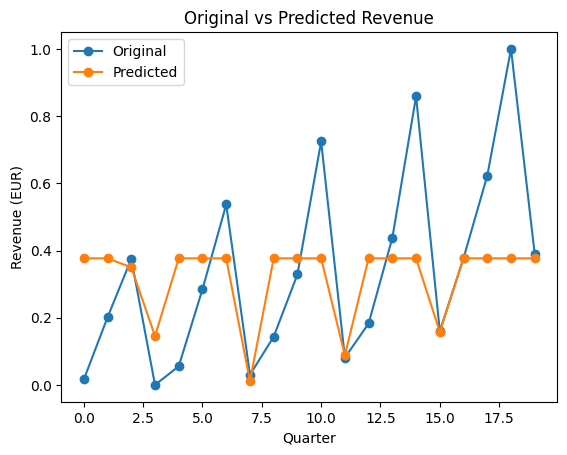

In [194]:
# 5
predicted=model_forcast.predict(x_forcast)
plt.figure()
plt.plot(range(0,len(forcastDemo)), y_forcast_norm, 'o-', label = 'Original')
plt.plot(range(0,len(forcastDemo)), predicted[:,0], 'o-', label = 'Predicted')
plt.xlabel('Quarter')
plt.ylabel('Revenue (EUR)')
plt.title('Original vs Predicted Revenue')
plt.legend()
plt.show()

### Question 3: Iris
- Load the iris dataset (`iris.csv`) and study its contents.
- Determine which columns we cannot use in this prediction?
- Now create an input data set `x_iris` and normalize it. Try one of the normalization techniques that you have not yet used in an exercise or assignment.
- Create a training data set and a test data set (`x_train_iris` and `x_test_iris`) consisting of `80%` and `20%` (randomly chosen) of the input data set `x_iris` respectively.
- Create a neural network with the correct inputs and outputs.
- Evaluate your neural network on your test data set (`x_test_iris`). What accuracy do you achieve?

**Name of Columns**: `sepal length` `sepal width` `petal length` `petal width` `target`

In [3]:
# 1
iris = pd.read_csv('../Data/Iris.csv', delimiter=',', decimal='.')
display(iris.head())

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# 2
print("We can't use the column 'target' in this prediction. It's a string.")

We can't use the column 'target' in this prediction. It's a string.


In [5]:
# 3
x_iris = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]                                       # Get the input
y_iris = iris[['target']]                                                                                           # Get the output

x_iris_norm = (x_iris - x_iris.min()) / (x_iris.max() - x_iris.min())                                               # Normalization of the input
y_iris_rep = y_iris.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2])       # Replace the output
y_iris_cat = to_categorical(y_iris_rep)                                                                             # One-hot encoding

In [6]:
# 3
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(x_iris_norm, y_iris_cat, test_size=0.2)     # Split the data
display(x_train_iris.head()) # 80%
display(x_test_iris.head())  # 20%

,sepal length,sepal width,petal length,petal width
58,0.638889,0.375000,0.610169,0.500000
102,0.777778,0.416667,0.830508,0.833333
75,0.638889,0.416667,0.576271,0.541667
135,0.944444,0.416667,0.864407,0.916667
54,0.611111,0.333333,0.610169,0.583333


,sepal length,sepal width,petal length,petal width
81,0.333333,0.166667,0.457627,0.375000
84,0.305556,0.416667,0.593220,0.583333
144,0.666667,0.541667,0.796610,1.000000
97,0.527778,0.375000,0.559322,0.500000
83,0.472222,0.291667,0.694915,0.625000


In [7]:
# 4
inputs_iris = Input(shape=(4,))
x_ir = Dense(8, activation='sigmoid')(inputs_iris)
x_ir = Dense(16, activation='sigmoid')(x_ir)
x_ir = Dense(32, activation='sigmoid')(x_ir)
x_ir = Dense(16, activation='sigmoid')(x_ir)
x_ir = Dense(8, activation='sigmoid')(x_ir)
outputs_iris = Dense(3, activation='softmax')(x_ir) # Activation=softmax for one-hot encoding (classification)

model_iris = Model(inputs_iris, outputs_iris, name='Iris_NN')

lr = 0.001  # Learning rate
model_iris.compile(optimizer=Adam(learning_rate=lr), 
                   loss=keras.losses.categorical_crossentropy, 
                   metrics=['accuracy'])

In [8]:
history_iris = model_iris.fit(
                            x_train_iris,
                            y_train_iris,
                            epochs=1000,
                            callbacks=[PlotLossesKeras()],
                            verbose=False)

accuracy
	accuracy         	 (min:    0.342, max:    0.983, cur:    0.983)
Loss
	loss             	 (min:    0.067, max:    1.785, cur:    0.067)


In [9]:
model_iris.summary()

Model: "Iris_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,259 (16.64 KB)

 Trainable params: 1,419 (5.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,840 (11.10 KB)

In [10]:
# 5
accuracy = model_iris.evaluate(x_test_iris, y_test_iris)
print(f"Accuracy on test data in percentage: {accuracy[1]*100}")

if accuracy[1] > 0.9:
    print("The Artificial Neural Network is performing well.")
else:
    print("The Artificial Neural Network is not performing well.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step - accuracy: 0.9667 - loss: 0.0796
Accuracy on test data in percentage: 96.66666388511658
The Artificial Neural Network is performing well.


In [203]:
# Additional tests predict the class with input data. (class = Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2) string
predicted_data = pd.DataFrame({'sepal length': [5.9], 'sepal width': [3.0], 'petal length': [5.1], 'petal width': [1.8]})
predicted_data_norm = (predicted_data - x_iris.min()) / (x_iris.max() - x_iris.min())
prediction = model_iris.predict(predicted_data_norm)

threshold = 0.5 
predicted_class_threshold = np.where(prediction > threshold)[1][0]
switcher = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

print(f"Prediction: {switcher.get(predicted_class_threshold)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction: Iris-virginica
